In [34]:
import numpy as np
import matplotlib.pyplot as py
from numpy import linalg as LA

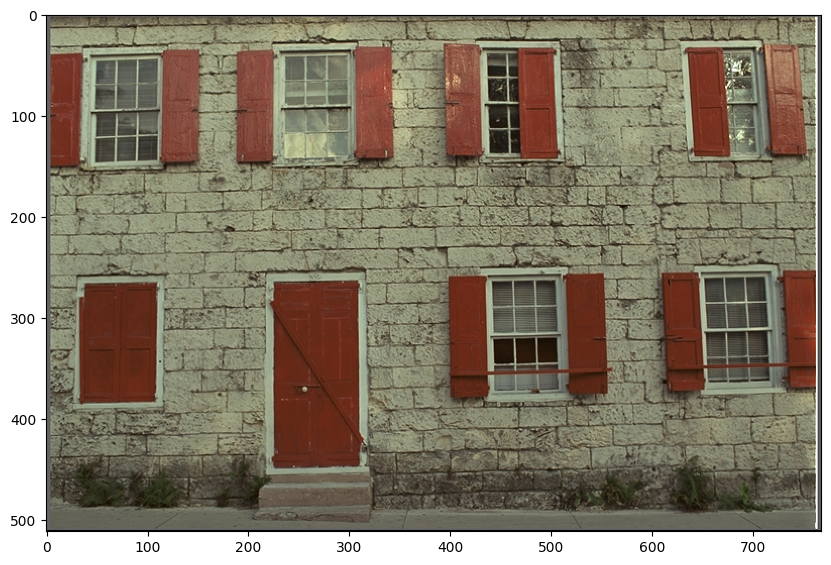

In [35]:
fig1 = py.figure(figsize = (10,10))
imagelue = py.imread('./images/kodim01.png')
image=imagelue.astype('double')
py.imshow(imagelue)
py.show()

Calcul des valeurs moyennes des RGB. Nécessaire pour calculer la matrice de covariance des RGB

In [36]:
sommeR = 0.0
sommeG = 0.0
sommeB = 0.0
for i in range(len(image)):
    for j in range(len(image[0])):
        sommeR=sommeR+image[i][j][0]
        sommeG=sommeG+image[i][j][1]
        sommeB=sommeB+image[i][j][2]
        
nbPixels = len(image)*len(image[0])        
MoyR= sommeR / nbPixels
MoyG= sommeG / nbPixels
MoyB= sommeB / nbPixels

print(MoyR)
print(MoyG)
print(MoyB)

0.4696520181222894
0.42645613043259445
0.3466138940446501


Calcul de la matrice de covariance des RGB

In [37]:
covRGB = np.zeros((3,3), dtype = "double")
for i in range(len(image)):
    for j in range(len(image[0])):
        vecTemp=[[image[i][j][0] - MoyR], [image[i][j][1]] - MoyG, [image[i][j][2] - MoyB]]
        vecProdTemp = np.dot(vecTemp,np.transpose(vecTemp))
        covRGB = np.add(covRGB,vecProdTemp)

covRGB = covRGB / nbPixels        
print(covRGB)

[[0.01833914 0.02049312 0.01789468]
 [0.02049312 0.03076895 0.02735522]
 [0.01789468 0.02735522 0.02474603]]


Calcul des vecteurs propres et valeurs propres

In [38]:
eigval, eigvec = LA.eig(covRGB)
print(eigval)
print()
print(eigvec)

[0.06969033 0.0039525  0.00021129]

[[ 0.46814403  0.88056406  0.07381131]
 [ 0.65969535 -0.29269976 -0.69219138]
 [ 0.58791429 -0.37273824  0.71792965]]


Pour illustrer les bénéfices du changement de repère, une composante sur trois sera supprimée dans le nouveau repère. a=Mb, où b est la composant RGB - la moyenne, M la matrice de transformation de repère, et a est la composante dans l'espace des vecteurs propres. 

In [39]:
eigvec = np.transpose(eigvec)
eigvecsansAxe0 = np.copy(eigvec)
eigvecsansAxe0[0,:] = [0.0,0.0,0.0]
eigvecsansAxe1 = np.copy(eigvec)
eigvecsansAxe1[1,:] = [0.0,0.0,0.0]
eigvecsansAxe2 = np.copy(eigvec)
eigvecsansAxe2[2,:] = [0.0,0.0,0.0]

imageKLsansAxe0 = np.copy(image)
imageKLsansAxe1 = np.copy(image)
imageKLsansAxe2 = np.copy(image)

vecMoy =[[MoyR], [MoyG], [MoyB]] 

for i in range(len(image)):
    for j in range(len(image[0])):
        vecTemp=[[image[i][j][0]], [image[i][j][1]], [image[i][j][2]]]
        #a=Mb
        imageKLsansAxe0[i][j][:] = np.reshape(np.dot(eigvecsansAxe0,np.subtract(vecTemp,vecMoy)),(3))
        imageKLsansAxe1[i][j][:] = np.reshape(np.dot(eigvecsansAxe1,np.subtract(vecTemp,vecMoy)),(3))
        imageKLsansAxe2[i][j][:] = np.reshape(np.dot(eigvecsansAxe2,np.subtract(vecTemp,vecMoy)),(3))
                                      

#question 2
# creer une fonction avec nom du fichier, choix de lespace colorimetrique, quantification
# pour 8/8/4, en gros on veut diviser en 2^4 niveaux, soit 16 niveaux, donc on voudrais diviser l'intervalle [0,255] en 16 intervalles de taille 16
# 40 compressions car 8*5 = 40. on a deja 8/8/8, 8/8/4, 8/8/0, 8/8/4, il faut trouver la derniere quantification, soit 8/4/4

#question 3
# 25 compressions car 5*5 = 25. blabla copilot: on a deja 8/8/8, 8/8/4, 8/8/0, 8/8/4, 8/4/4, il faut trouver la derniere quantification, soit 8/4/0

Les images dans les repères définis par les vecteurs propres ne peuvent pas être affichées. Toutefois, en éliminant un axe, on a retiré 33% de l'information. Une composante vaut zéro. Exemple:

In [40]:
print(imageKLsansAxe0[10][10][:])

[ 0.         -0.01239022 -0.01580802]


En faisant la transformée inverse, on peut voir les images qui résultent de la compression. b=inv(M)a. Dans le code, on utilse pinv (Pseudo-inverse), car la matrice est parfois singulière. Il faut faire b + moyenne.

In [41]:
invEigvecsansAxe0 = LA.pinv(eigvecsansAxe0);
invEigvecsansAxe1 = LA.pinv(eigvecsansAxe1);
invEigvecsansAxe2 = LA.pinv(eigvecsansAxe2);

vecMoy =[MoyR, MoyG, MoyB] 
imageRGBsansAxe0 = np.copy(image)
imageRGBsansAxe1 = np.copy(image)
imageRGBsansAxe2 = np.copy(image)

for i in range(len(image)):
    for j in range(len(image[0])):
        #b=inv(M)a
        vecTempsansAxe0=[[imageKLsansAxe0[i][j][0]], [imageKLsansAxe0[i][j][1]], [imageKLsansAxe0[i][j][2]]]
        vecTempsansAxe1=[[imageKLsansAxe1[i][j][0]], [imageKLsansAxe1[i][j][1]], [imageKLsansAxe1[i][j][2]]]
        vecTempsansAxe2=[[imageKLsansAxe2[i][j][0]], [imageKLsansAxe2[i][j][1]], [imageKLsansAxe2[i][j][2]]]     
        imageRGBsansAxe0[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe0,vecTempsansAxe0),(3)),vecMoy)
        imageRGBsansAxe1[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe1,vecTempsansAxe1),(3)),vecMoy)
        imageRGBsansAxe2[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe2,vecTempsansAxe2),(3)),vecMoy)

Résultat sans l'axe de plus grande énergie. L'image est très dégradée.

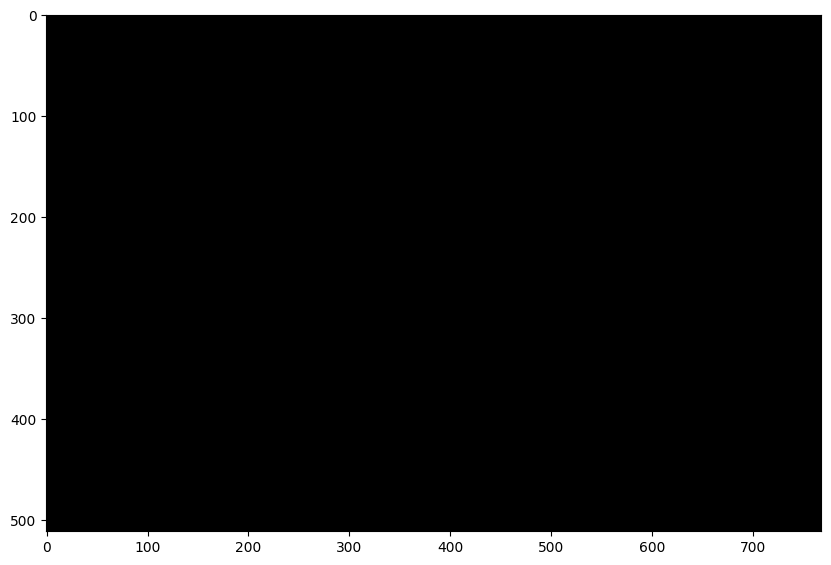

In [42]:
fig2 = py.figure(figsize = (10,10))
imageout = np.clip(imageRGBsansAxe0,0,255)
imageout= imageout.astype('uint8')
py.imshow(imageout)
py.show()

Résultat sans l'axe de moyenne énergie. L'image assez dégradée.

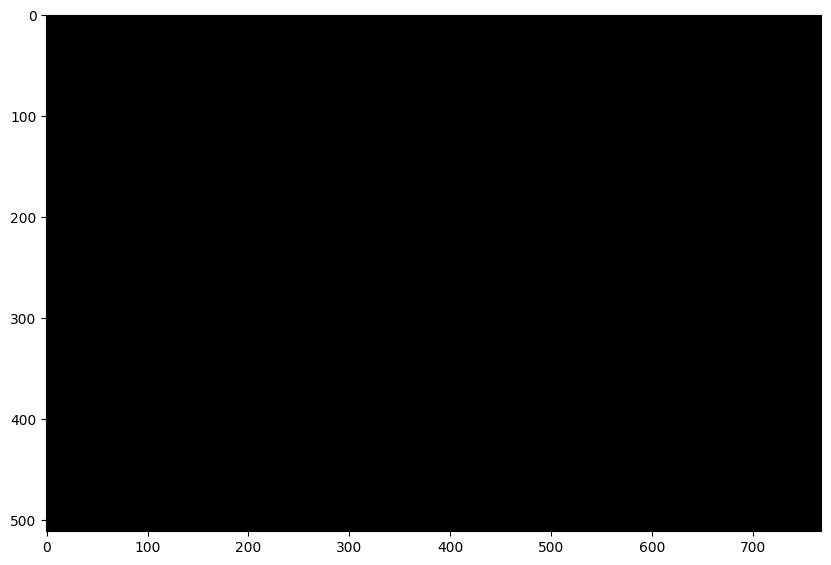

In [43]:
fig2 = py.figure(figsize = (10,10))
imageout = np.clip(imageRGBsansAxe1,0,255)
imageout= imageout.astype('uint8')
py.imshow(imageout)
py.show()

Résultat sans l'axe de faible énergie. L'impact sur l'image est minime.

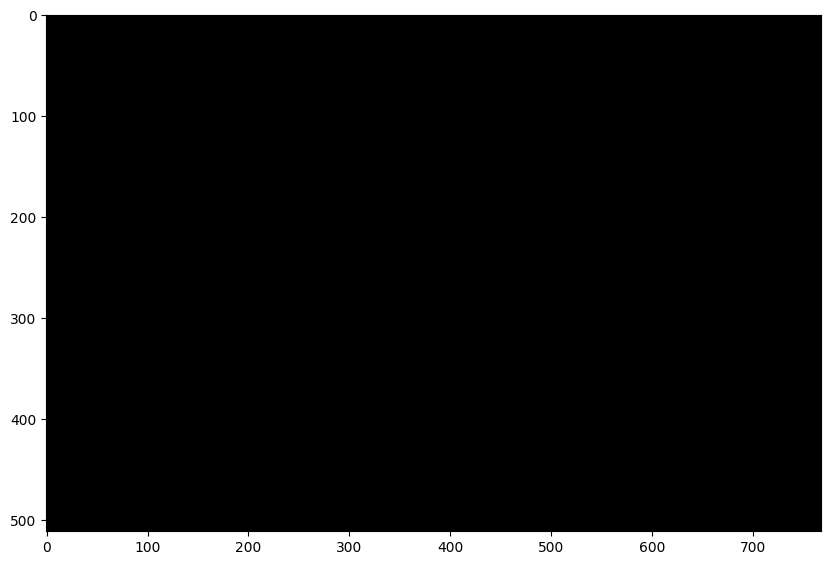

In [44]:
fig2 = py.figure(figsize = (10,10))
imageout = np.clip(imageRGBsansAxe2,0,255)
imageout= imageout.astype('uint8')
py.imshow(imageout)
py.show()